In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import OneHotEncoder

# Explore the Titanic dataset

In [45]:
df = pd.read_csv('train.csv')
df.shape

(891, 12)

In [46]:
df.drop(['PassengerId','Ticket','Cabin'], axis=1, inplace=True)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


### Check Correlations

<AxesSubplot:>

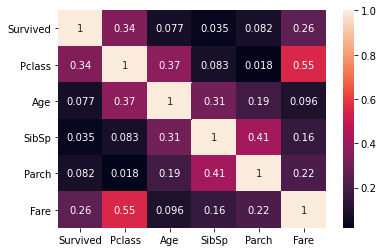

In [5]:
sns.heatmap(df.corr().abs(),annot=True)

In [6]:
#sns.pairplot(df, hue='Survived')

### Check missing cells

<AxesSubplot:>

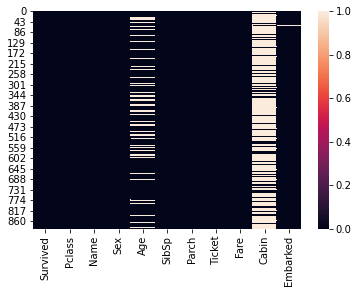

In [7]:
sns.heatmap(df.isna())

# Name

### To take name feature in account, 'Name' is replaced with 'Name Length'

In [8]:
df["Name"]= df["Name"].str.len()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    int64  
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


### Scale 'Name Length' using MinMaxScaler

In [10]:
df_Name_scaled = pd.DataFrame(MinMaxScaler().fit(df[['Name']]).transform(df[['Name']]), 
                              columns=df[['Name']].columns)
df["Name"] = df_Name_scaled 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    float64
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(3), int64(4), object(4)
memory usage: 76.7+ KB


# Sex

### Encode 'Sex' using OneHotEncoder

In [12]:
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
ohe.fit(df[['Sex']])
Sex_labels = ['male','female']
ohe_Sex = pd.DataFrame(ohe.transform(df[['Sex']]), columns=Sex_labels)

### Join encoded 'Sex' feature to dataframe

In [13]:
df = df.join(ohe_Sex, how='outer')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    float64
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
 11  male      891 non-null    float64
 12  female    891 non-null    float64
dtypes: float64(5), int64(4), object(4)
memory usage: 129.7+ KB


# Age

### To impute missing values in 'Age'

In [14]:
imputer_age = SimpleImputer(strategy='mean',)
imputer_age.fit(df[['Age']])
age_imputed = pd.DataFrame(imputer_age.transform(df[['Age']]))
df[['Age']] = age_imputed

### Bin the imputed Age column into 3 bins (young, middle-aged, old)

In [15]:
kbins = KBinsDiscretizer(n_bins=3, encode='onehot-dense', strategy='quantile')
kbins.fit(age_imputed)

labels = ['young', 'middle-aged', 'old']
age_bins = pd.DataFrame(kbins.transform(age_imputed), columns=labels)
age_bins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   young        891 non-null    float64
 1   middle-aged  891 non-null    float64
 2   old          891 non-null    float64
dtypes: float64(3)
memory usage: 21.0 KB


### Join binned 'Age' into dataframe

In [16]:
df= df.join(age_bins, how='outer')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    float64
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  male         891 non-null    float64
 12  female       891 non-null    float64
 13  young        891 non-null    float64
 14  middle-aged  891 non-null    float64
 15  old          891 non-null    float64
dtypes: float64(8), int64(4), object(4)
memory usage: 150.6+ KB


# Embarked

### To impute missing values in 'Embarked'

In [17]:
imputer_emb = SimpleImputer(strategy='most_frequent',)
imputer_emb.fit(df[['Embarked']])
emb_imputed = pd.DataFrame(imputer_emb.transform(df[['Embarked']]))
df[['Embarked']] = emb_imputed

### Encode 'Embarked' using OneHotEncoder

In [18]:
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
ohe.fit(df[['Embarked']])
Embarked_labels = ['em1','em2','em3']
ohe_Embarked = pd.DataFrame(ohe.transform(df[['Embarked']]), columns=Embarked_labels)

### Join encoded 'ohe_Embarked' into dataframe

In [19]:
df = df.join(ohe_Embarked, how='outer')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    float64
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     891 non-null    object 
 11  male         891 non-null    float64
 12  female       891 non-null    float64
 13  young        891 non-null    float64
 14  middle-aged  891 non-null    float64
 15  old          891 non-null    float64
 16  em1          891 non-null    float64
 17  em2          891 non-null    float64
 18  em3          891 non-null    float64
dtypes: float

# Fare

### Scale the Fare column

In [20]:
df_Fare_scaled = pd.DataFrame(MinMaxScaler().fit(df[['Fare']]).transform(df[['Fare']]), 
                              columns=df[['Fare']].columns)
df['Fare'] = df_Fare_scaled
df['Fare']

0      0.014151
1      0.139136
2      0.015469
3      0.103644
4      0.015713
         ...   
886    0.025374
887    0.058556
888    0.045771
889    0.058556
890    0.015127
Name: Fare, Length: 891, dtype: float64